In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import os

In [2]:
#Set notebook preferences
pd.set_option('display.max_colwidth', None)

plt.style.use('ggplot')

In [3]:
#Read in rawData
path= r'/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/FinancialNewsSentimentAnalysis/'
config_name= 'config.yaml'

#read yaml file
with open(os.path.join(path, config_name)) as file:
    config = yaml.safe_load(file)
    
rawData= pd.read_csv(config['paths']['rawData'], header=None)
rawData.columns= ['sentiment', 'newsHeadline']

**Preview Data**

In [4]:
print('Data Shape: %s\n' % (str(rawData.shape)))
print('Value counts: \n%s\n' % (rawData['sentiment'].value_counts()))
display(rawData.head())

Data Shape: (4846, 2)

Value counts: 
neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64



,sentiment,newsHeadline
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


Missing Data

In [5]:
#Check value counts
display(rawData.isna().sum())

sentiment       0
newsHeadline    0
dtype: int64

### EDA

Label Counts

Text(0, 0.5, '')

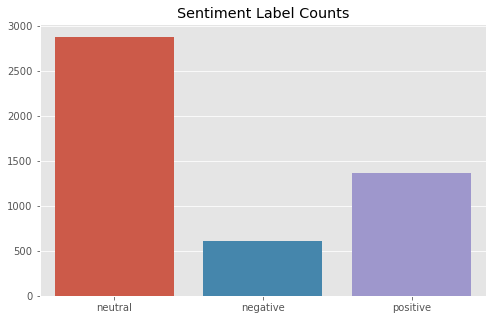

In [6]:
f, ax= plt.subplots(figsize= (8,5))

j= sns.countplot(x= rawData['sentiment'], ax= ax, data= rawData);

j.set_title('Sentiment Label Counts')
j.set_xlabel('')
j.set_ylabel('')

Word Counts per Sentiment

In [7]:
os.chdir('/Users/ksharma/Documents/ML Engineer/Machine Learning/Projects/FinancialNewsSentimentAnalysis')

from src.preprocessing.preprocessing import Preprocessor

In [8]:
#Process newsHeadline data
tokens= Preprocessor(rawData.loc[:,'newsHeadline'])

tokens.normalization()
tokens.tokenization()
tokens.lemmatization()

#Append lemma to raw data for word cloud visualiztion
cleanDf= rawData.copy()
cleanDf['lemmaTokens']= tokens.lemmaTokens

cleanDf.head()

,sentiment,newsHeadline,lemmaTokens
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .","[according, to, gran, the, company, ha, no, plan, to, move, all, production, to, russia, although, that, is, where, the, company, is, growing]"
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .","[technopolis, plan, to, develop, in, stage, an, area, of, no, le, than, 100000, square, meter, in, order, to, host, company, working, in, computer, technology, and, telecommunication, the, statement, said]"
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .","[the, international, electronic, industry, company, elcoteq, ha, laid, off, ten, of, employee, from, it, tallinn, facility, contrary, to, earlier, layoff, the, company, contracted, the, rank, of, it, office, worker, the, daily, postimees, reported]"
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,"[with, the, new, production, plant, the, company, would, increase, it, capacity, to, meet, the, expected, increase, in, demand, and, would, improve, the, use, of, raw, material, and, therefore, increase, the, production, profitability]"
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .","[according, to, the, company, s, updated, strategy, for, the, year, 20092012, basware, target, a, longterm, net, sale, growth, in, the, range, of, 20, 40, with, an, operating, profit, margin, of, 10, 20, of, net, sale]"


In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Positive Words

In [10]:
#Negative Sentiment Words

In [11]:
#Neutral Sentiment Words